# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('df_scikitlearn.csv') 

X = df.drop(columns=['mau'])
y = df['mau']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

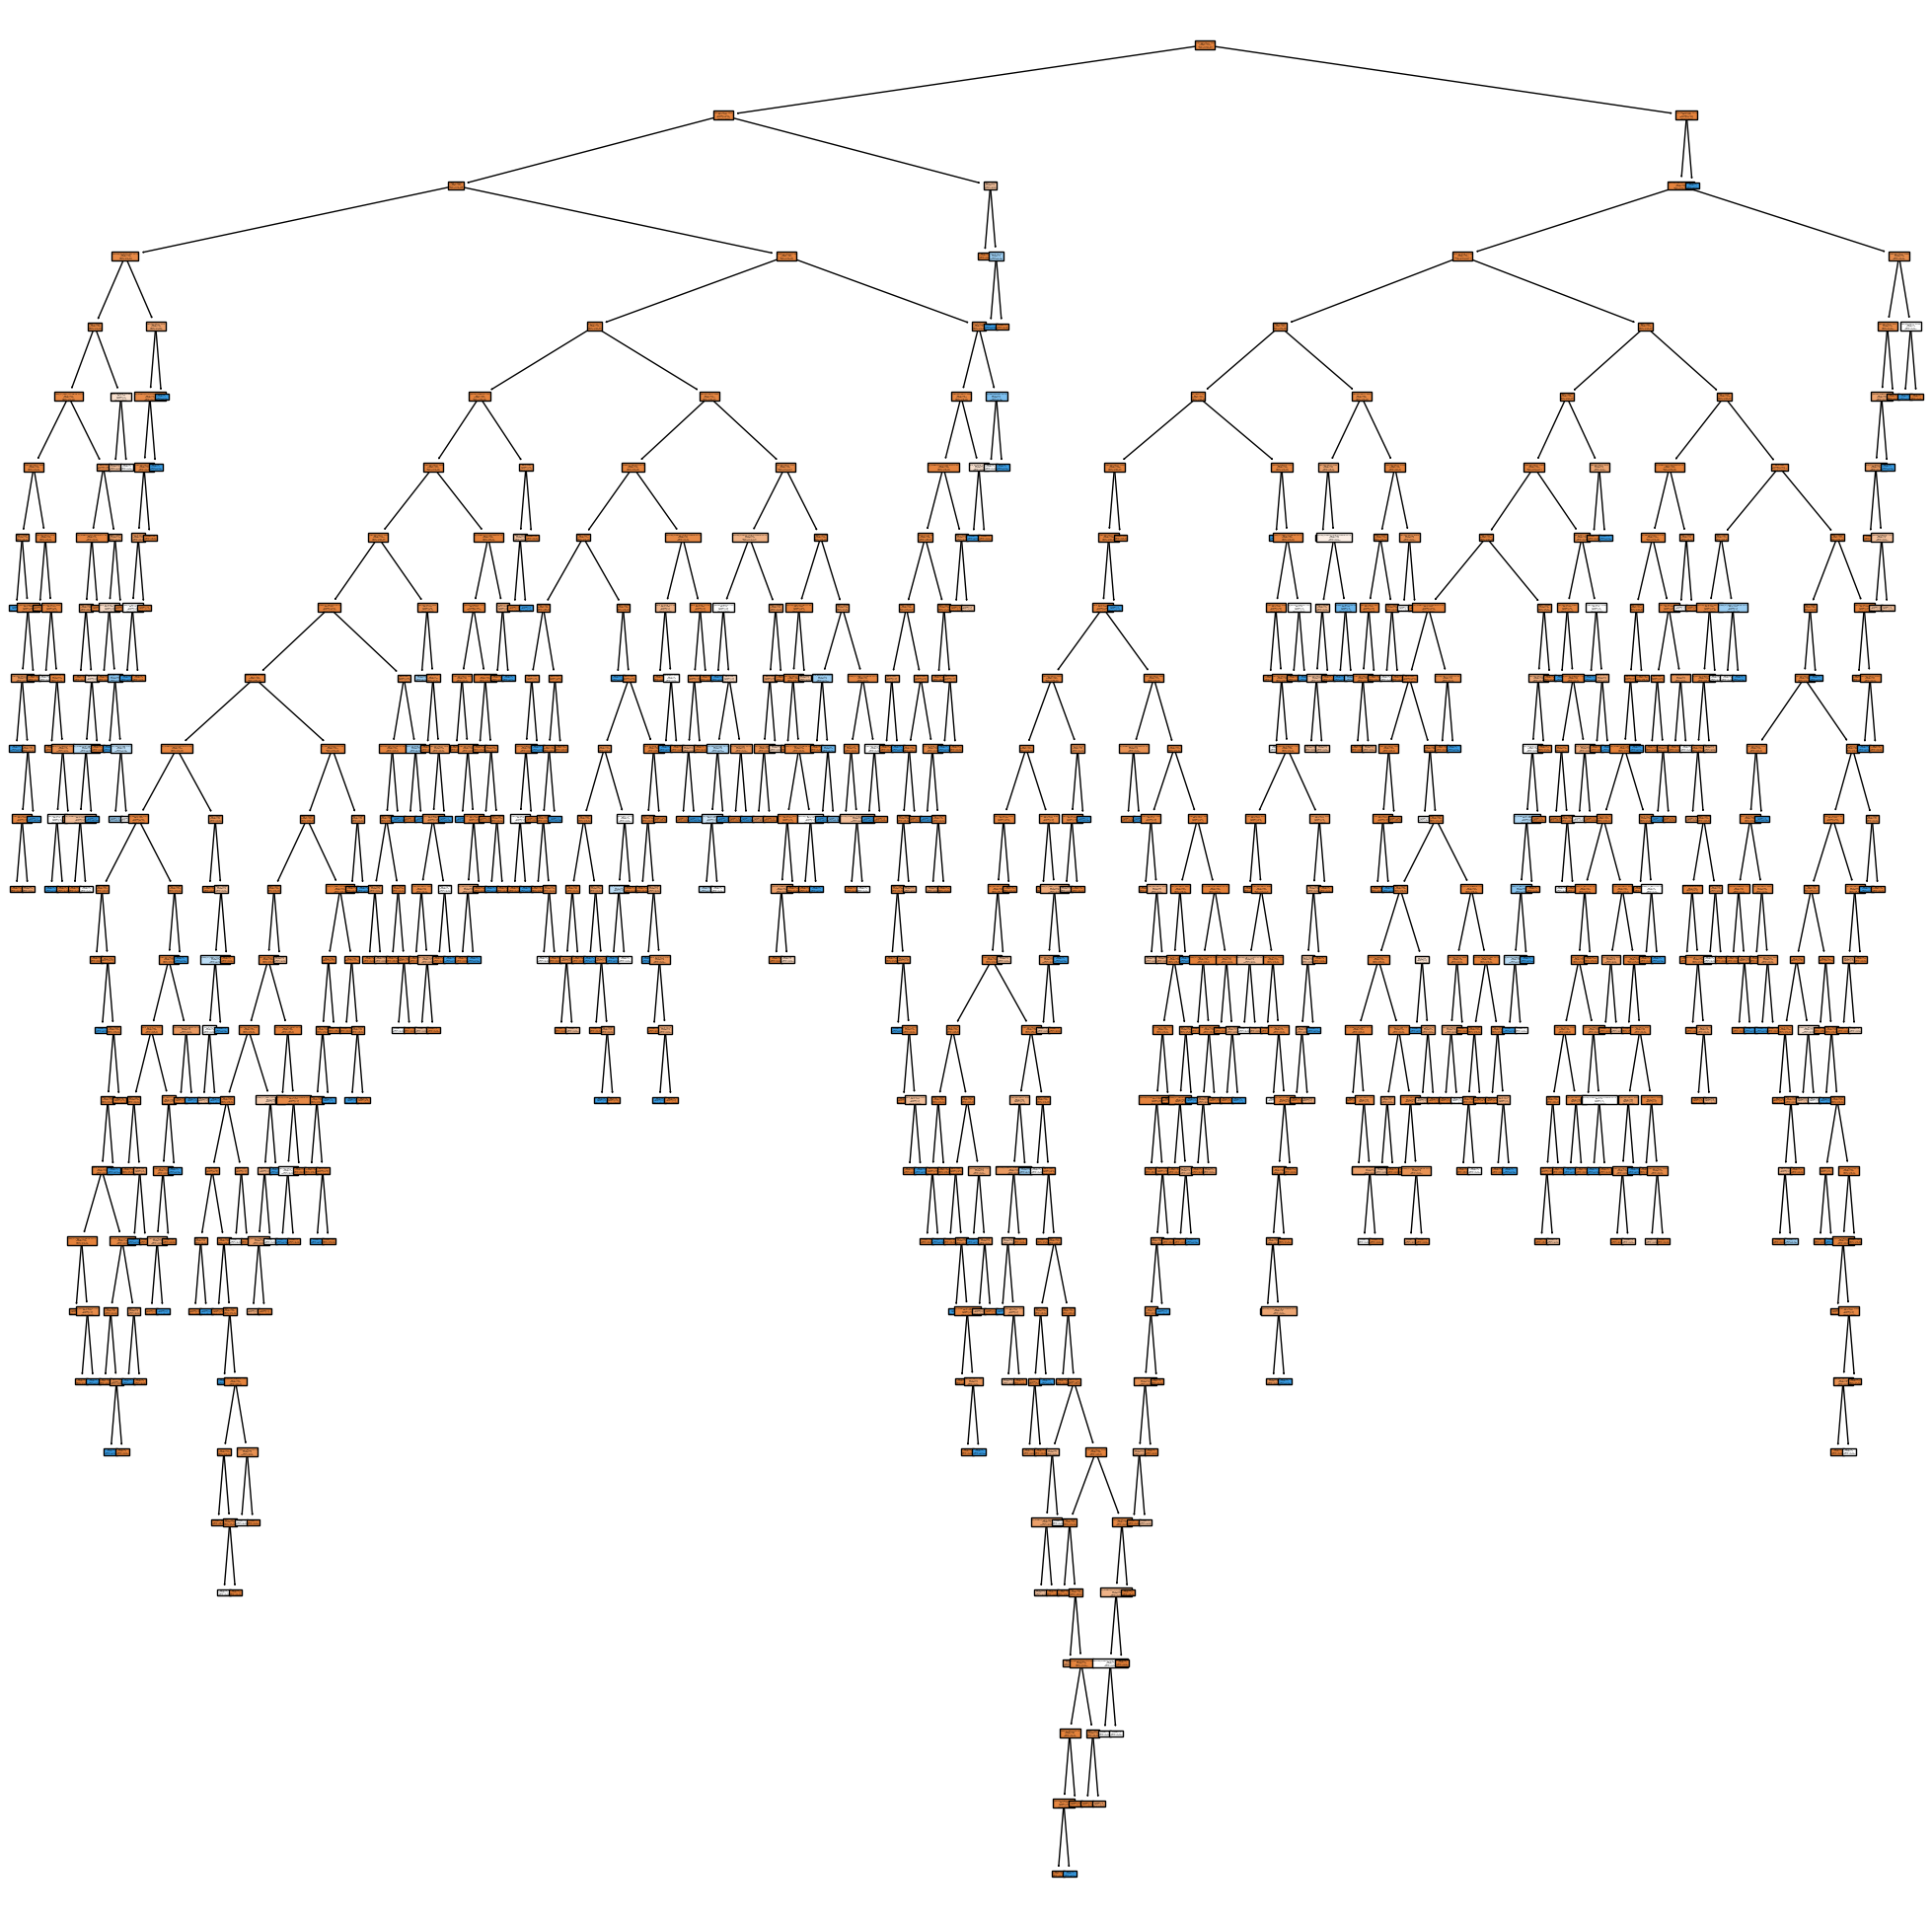

In [3]:
clf = DecisionTreeClassifier(random_state=100)

clf.fit(X_treino, y_treino)

plt.figure(figsize=(25, 25))
plot_tree(clf, filled = True, feature_names = X.columns, class_names=['aprovado', 'reprovado'])
plt.show()

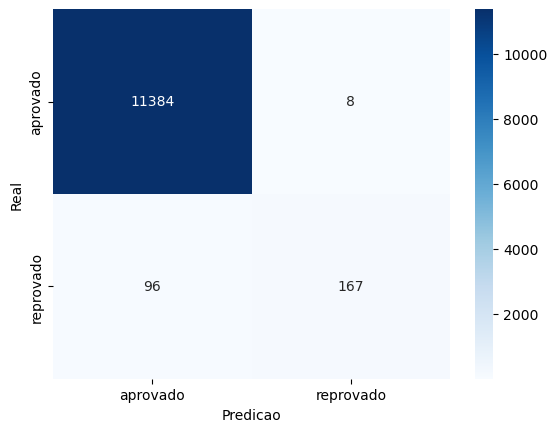

In [4]:
y_treino_pred = clf.predict(X_treino)

matrix_conf = confusion_matrix(y_treino, y_treino_pred)

sns.heatmap(matrix_conf, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=['aprovado', 'reprovado'], yticklabels=['aprovado', 'reprovado'])
plt.xlabel('Predicao')
plt.ylabel('Real')
plt.show()

In [5]:
acuracia_treino = accuracy_score(y_treino, y_treino_pred)
acuracia_treino

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [11]:
y_teste_pred = clf.predict(X_teste)
teste_matrix_conf = confusion_matrix(y_teste, y_teste_pred)

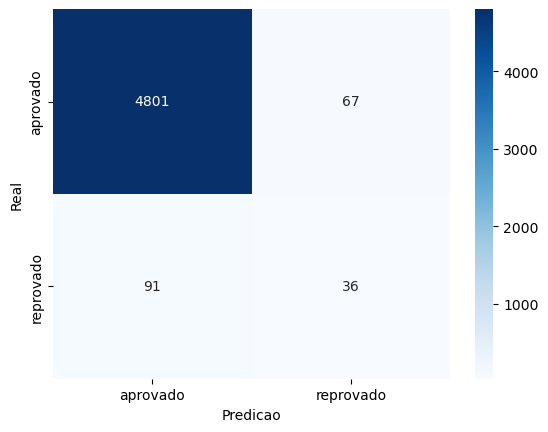

In [13]:
sns.heatmap(teste_matrix_conf, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['aprovado', 'reprovado'], yticklabels=['aprovado', 'reprovado'])
plt.xlabel('Predicao')
plt.ylabel('Real')
plt.show()

In [17]:
acuracia_teste = accuracy_score(y_teste, y_teste_pred)
acuracia_teste

0.9683683683683684

A acuracia da predição da base de teste teve uma diferença de cerca de 0.022 em relação a base de treino.

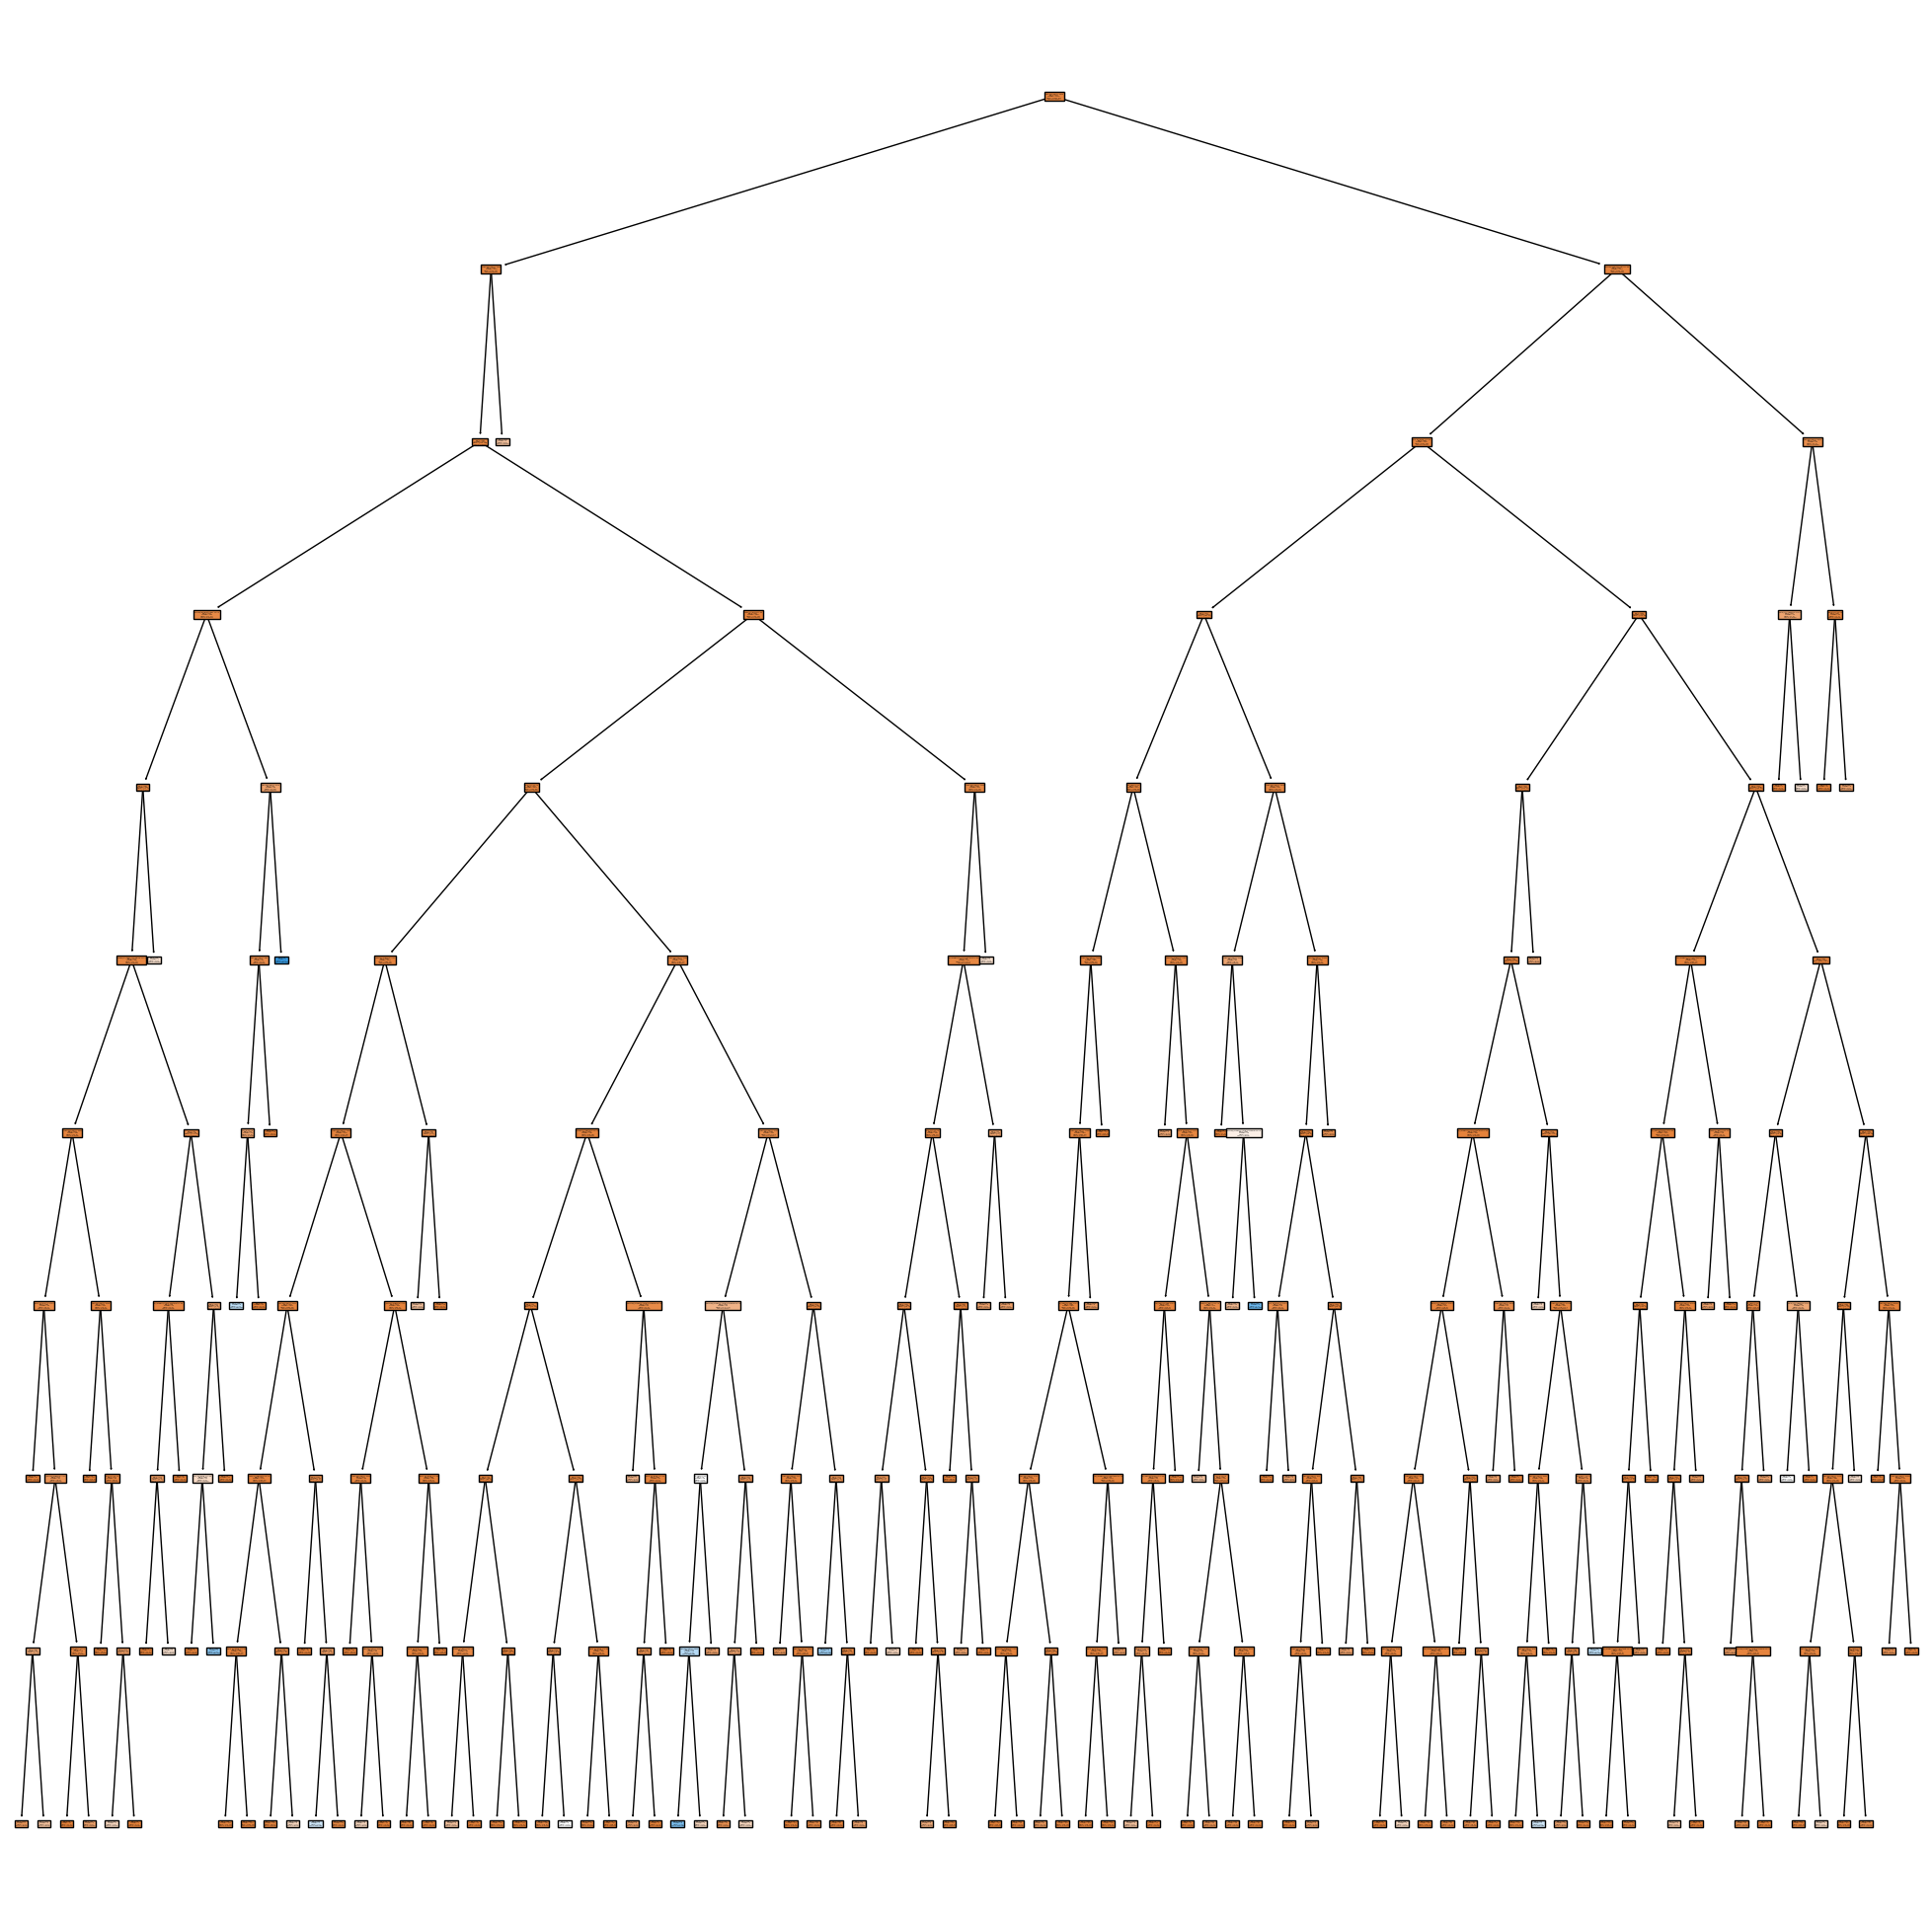

In [26]:
clf_restrita = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 10, random_state = 123)
clf_restrita.fit(X_treino, y_treino)
plt.figure(figsize=(25, 25))
plot_tree(clf_restrita, filled = True, feature_names = X.columns, class_names=['aprovado', 'reprovado'])
plt.show()

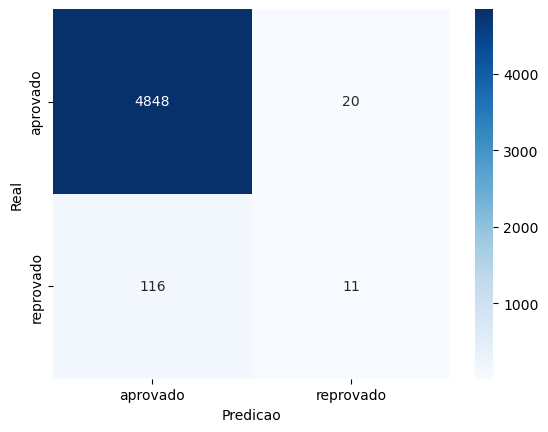

In [30]:
y_teste_restrita_pred = clf_restrita.predict(X_teste)
matrix_conf_restrita = confusion_matrix(y_teste, y_teste_restrita_pred)
sns.heatmap(matrix_conf_restrita, annot = True, fmt='d', cmap = 'Blues', xticklabels = ['aprovado', 'reprovado'], yticklabels = ['aprovado', 'reprovado'])
plt.xlabel('Predicao')
plt.ylabel('Real')
plt.show()

Fazendo as contas se chega que cerca de 2.06% dos proponentes foram classificados como maus pelo modelo (somando os falsos positivos com verdadeiros positivos e dividindo pelo total). Esse valor é relativamente baixo em comparação com o total de clientes que foram avaliados.

In [32]:
acuracia_restrita_teste = accuracy_score(y_teste, y_teste_restrita_pred)
acuracia_restrita_teste

0.9727727727727727

In [36]:
all_good_accuracy = (y_teste == 0).mean()
all_good_accuracy 

0.9745745745745745

Mesmo que essa acuracia pareça boa ela não significa uma boa performance do modelo, pois ele não estaria identificando corretamente nenhum caso de mau, o que é o proposito do modelo, em outras palavras ele teria uma inclinação muito grande para a classe de bom e não seria util para prever um contrato propenso a clasee mau.